## 0/1 Knapsack problem

We will build a DP array, in such a way the columns represent the weight of the knapsack and rows indicate the elements to be added. dp[i][j] represents the maximum value obtained by adding i elements into the knapsack of size j. In this we calculate all possibilities and return the last element in DP array. Here we need to choose whether we can add the element to knapsack or not, if we add we add the value of current element and find the best value of elements that were previously added, or we dont add the current element. The DP equation is as follows:

input:
wt[]
val[]
W

dp[i][j] = max{val[i-1]+dp[i-1][j-wt[i-1]] , dp[i-1][j]}

In [25]:
def knapsack(wt,val,W):
    n= len(val)
    dp=[[0]*(W+1) for i in range(n+1)]
    for i in range(1,n+1):
        for j in range(1,W+1):
            ## we only consider the current element if it is less than the knapsack weight of subproblem, otherwise 
            ## we dont include that element and return the above value
            if(wt[i-1]<=j):
                dp[i][j] = max(val[i-1]+dp[i-1][j-wt[i-1]], dp[i-1][j])
            else:
                dp[i][j] = dp[i-1][j]
                
    return dp[n][W]

In [26]:
knapsack([10, 20, 30],[60, 100, 120],50)

220

In [27]:
weights =[2, 3, 1, 4]
profits =[4, 5, 3, 7]
capacity=5
knapsack(weights,profits,capacity)

10

## Partition equal subset sum



Given a non-empty array nums containing only positive integers, find if the array can be partitioned into two subsets such that the sum of elements in both subsets is equal.

We use dynamic programming programming here. It is similar to 0/1 Knapsack problem. Where the total weight is sum(arr)/2 and we need to find subset elements in arr, so that their sum is equal to sum(arr)/2. so we create a DP table with (n+1) rows and (sum(arr)/2 + 1) dimensions which indicates boolean values whether we can get subset sum for i elements into consideration with weight as j, and we need to choose whether we can add the element into our sum or not at each level. The DP equation is as follows:

dp[i][j] = dp[i-1][j-arr[i-1]] or dp[i-1][j]

In [28]:
def canPartition(nums):
    s = sum(nums)
    n= len(nums)
    if(s%2!=0):
        return False;
    s=s//2
    dp=[[False]*(s+1) for i in range(n+1)]
    dp[0][0]=True
    for i in range(n+1):
        dp[i][0]=True
    for i in range(1,n+1):
        for j in range(1,s+1):
            ## we only consider the current element if it is less than the subset sum we needed, otherwise we 
            ## dont include that element and return the above value
            if(nums[i-1]<=j):
                dp[i][j] = (dp[i-1][j-nums[i-1]]) or (dp[i-1][j])
            else:
                dp[i][j] = dp[i-1][j]
                
    return dp[n][s]

    
    
        

In [29]:
canPartition([1,5,11,5])

True

## Target Sum problem Leetcode:494

In the above partition equal subset sum problem we have found out, whether it is possible get a subset of array so that its sum gives a particular given sum. Now we need to find out, how we can count the number of subsets so that their sum equal to given sum. Target sum is the complicated version of this, we simplify the target sum into finally the above mentioned problem.


Read the Target sum question prompt

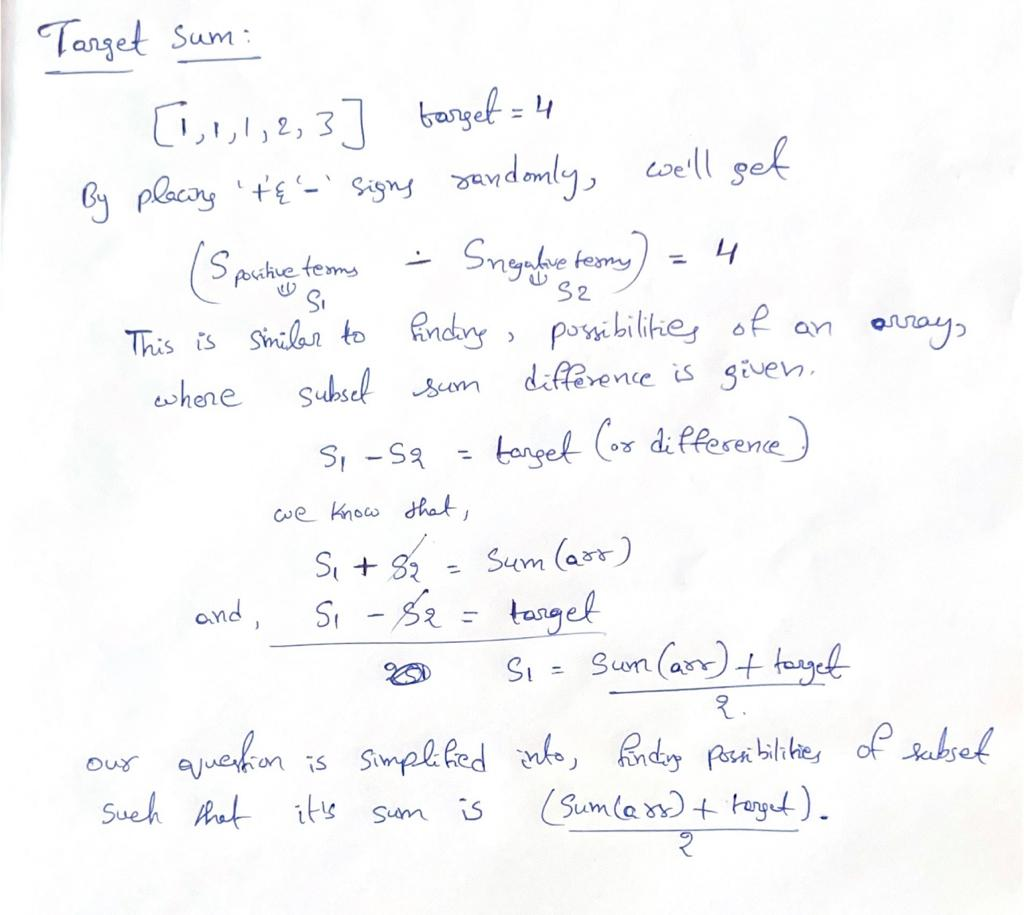

In the above partition equal subset sum problem we have found out, whether it is possible get a subset of array so that its sum gives a particular given sum. Now we need to find out, how we can count the number of subsets so that their sum equal to given sum (a simplifies version of Target sum problem as explained abouve). For that we modify our dp[] such that it. returns the int value of maximum possible number of subsets for i elements into consideration that produce a subset sum j. For this problem, as we need to find out all possibilites we add the dp values of both excluding and including scenarios.

In [31]:
    def findTargetSumWays(nums, target):
        tot = sum(nums)
        n= len(nums)
        if((tot+target)%2!=0 or tot<target ):
            return 0
        s=(tot+target)//2
        if(s<0):
            return 0
        
        dp=[[0]*(s+1) for i in range(n+1)]
        
        for i in range(n+1):
            dp[i][0]=1
        for j in range(1,s+1):
            dp[0][j]=0
            
        for i in range(1,n+1):
            for j in range(0,s+1):
                if(nums[i-1]<=j):
                    dp[i][j] = dp[i-1][j-nums[i-1]] + dp[i-1][j]
                else:
                    dp[i][j] = dp[i-1][j]
        return dp[n][s]

In [32]:
nums = [1,1,1,1,1]
target = 3
findTargetSumWays(nums,target)

5